In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from typing import List, Dict
import numpy as np
import matplotlib.pyplot as plt
from PoorMansNN import NN
from PoorMansNN import act
from PoorMansNN import err
from PoorMansNN import opt

plt.rcParams["figure.figsize"] = (10,8)

def plotErrors(errors: Dict[str, List[float]]):
    for name, hist in errors.items():
        plt.plot(np.arange(len(hist)), hist, label=name)
    if len(errors):
        plt.title('Error history')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

def plotWeightHistory(n: NN, whist: List[np.ndarray], outnames: List[str]=[]):
    for i, w in enumerate(n.weights):
        plt.subplot(len(n.weights), 1, i+1)
        plt.title('Layer {0}->{1} weights'.format(i, i+1))
        for j in range(w.shape[1]):
            plt.plot(np.arange(epochs), whist[len(n.weights)+i][:, 0, j], label='Layer {0}, unit {1} bias'.format(i+1, outnames[j] if i==n.L-2 else j))
            for k in range(w.shape[0]):
                plt.plot(np.arange(epochs), whist[i][:, k, j], label='input {0}->unit {1}'.format(k, outnames[j] if i==n.L-2 else j))
        plt.legend()
    plt.xlabel('Epochs')
    plt.show()

def plotFinalWeights(n: NN, whist: List[np.ndarray], outnames: List[str]=[]):
    for i, w in enumerate(n.weights):
        plt.subplot(2, len(n.weights), i+1)
        plt.imshow(w, cmap='coolwarm', vmin=-3, vmax=3)
        plt.title('Layer {0}->{1} weights'.format(i, i+1))
        if (i==len(n.weights)-1):
            plt.xticks(np.arange(w.shape[1]), outnames)
        else:
            plt.xticks(np.arange(w.shape[1]), np.arange(w.shape[1]))
        plt.yticks(np.arange(w.shape[0]), np.arange(w.shape[0]))
        plt.xlabel('Units')
        plt.ylabel('Inputs')

        plt.subplot(2, len(n.weights), len(n.weights)+i+1)
        plt.imshow(n.biases[i], cmap='coolwarm', vmin=-3, vmax=3)
        plt.title('Layer {0}->{1} biases'.format(i, i+1))
        if (i==len(n.weights)-1):
            plt.xticks(np.arange(w.shape[1]), outnames)
        else:
            plt.xticks(np.arange(w.shape[1]), np.arange(w.shape[1]))
        plt.yticks(np.arange(w.shape[0]), np.arange(w.shape[0]))
        plt.xlabel('Units')
        plt.ylabel('Inputs')
    plt.colorbar(ax=plt.gcf().axes)

## Testing instantiation, forward, and back propagation

In [4]:
layers = [4, 3, 10, 1]
activations = [act.sigmoid] * (len(layers) - 1)
dactivations = [act.dsigmoid] * (len(layers) - 1)
error = err.squared
derror = err.dsquared
optimizer = opt.Optimizer(rate=0.1)
n = NN(layers, activations=activations, dactivations=dactivations, error=error, derror=derror, optimizer=optimizer)
N = 10

assert len(n.weights) == len(layers)-1
for i, w in enumerate(n.weights):
    assert w.shape == (layers[i], layers[i+1])
print("Shape check passed.")

inputs = np.random.rand(N, layers[0])
labels = np.random.rand(N, layers[-1])

activations = n.feedforward(inputs)
assert len(activations) == len(layers)
assert len(activations[-1]) == N
print("Feedforward check passed.")

n.backpropagate(activations, labels)
print("Backpropagation check passed.")

Shape check passed.
Feedforward check passed.
Backpropagation check passed.


## AND gate

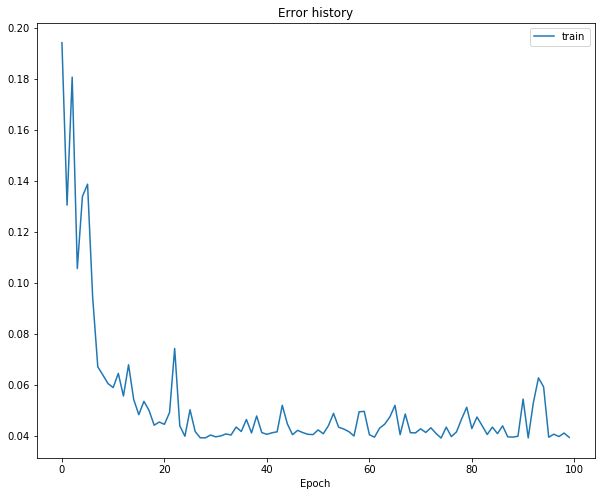

array([[-0.],
       [ 0.],
       [ 0.],
       [ 1.]])

In [20]:
batchsize = 4
epochs = 100
layers = [2, 1]
activations = [act.tanh] * (len(layers) - 1)
dactivations = [act.dtanh] * (len(layers) - 1)
error = err.squared
derror = err.dsquared
rate = 0.5
optimizer = opt.Optimizer(rate)

n = NN(layers, activations=activations, dactivations=dactivations, error=error, derror=derror, optimizer=optimizer)

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([[0],
              [0],
              [0],
              [1]])

errors, _ = n.train(X, Y, batchsize, epochs, train=(Y, X))
plotErrors(errors)
np.round(n.predict(X))

## OR gate

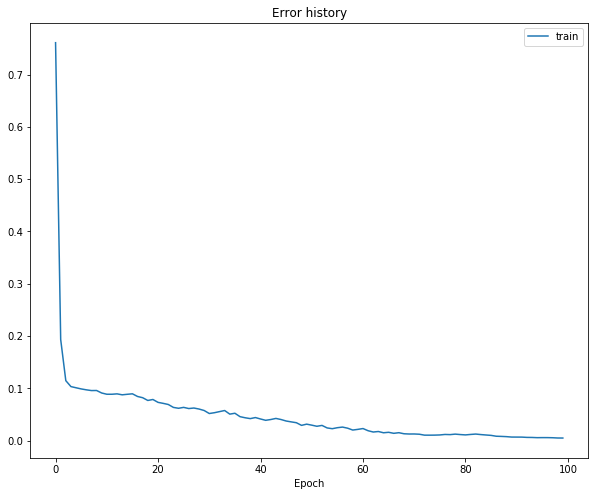

array([[ 0.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [21]:
batchsize = 4
epochs = 100
layers = [2, 1]
activations = [act.tanh] * (len(layers) - 1)
dactivations = [act.dtanh] * (len(layers) - 1)
error = err.squared
derror = err.dsquared
rate = 0.5
optimizer = opt.Optimizer(rate)

n = NN(layers, activations=activations, dactivations=dactivations, error=error, derror=derror, optimizer=optimizer)

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([[0],
              [1],
              [1],
              [1]])

errors, _ = n.train(X, Y, batchsize, epochs, train=(Y, X))
plotErrors(errors)
np.round(n.predict(X))

## XOR gate

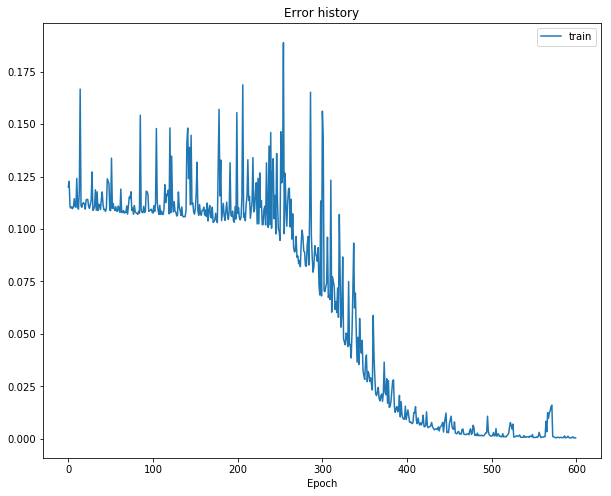

[[-0.]
 [ 1.]
 [ 1.]
 [-0.]]


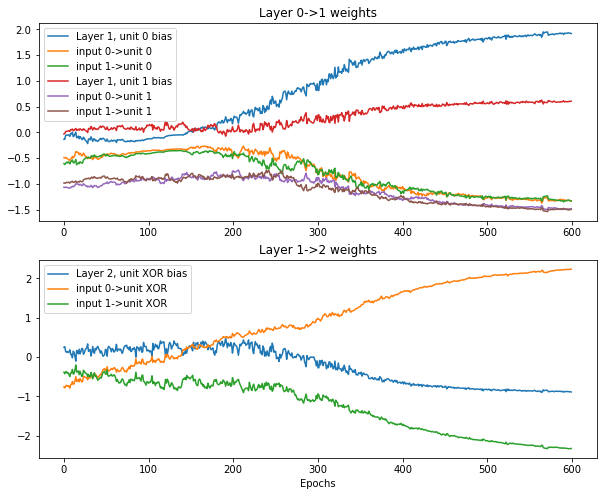

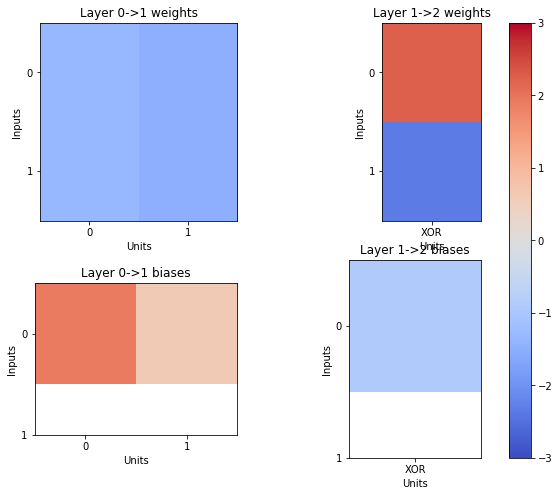

In [62]:
batchsize = 20
epochs = 600
layers = [2, 2, 1]

# Effects of using non-linear activations:
activations = [act.tanh] * (len(layers) - 1)
dactivations = [act.dtanh] * (len(layers) - 1)
# ---
# Effects of using no activation/ no non-linearity:
# activations = [act.linear] * (len(layers) - 1)
# dactivations = [act.dlinear] * (len(layers) - 1)
# ---
error = err.squared
derror = err.dsquared
rate = 0.5
optimizer = opt.Optimizer(rate)

n = NN(layers, activations=activations, dactivations=dactivations, error=error, derror=derror, optimizer=optimizer)

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])

errors, whist = n.train(X, Y, batchsize, epochs, weighthist=True, train=(Y, X))
plotErrors(errors)
print(np.round(n.predict(X)))
plotWeightHistory(n, whist, ['XOR'])
plotFinalWeights(n, whist, ['XOR'])


## AND, OR, NAND, XOR gates combined

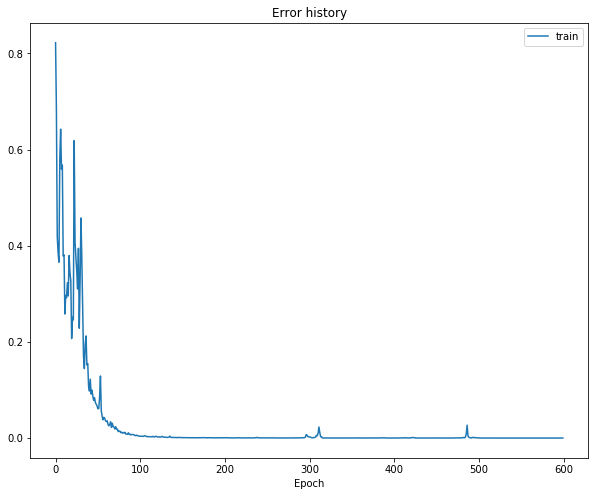

[[-0.  0.  1.  0.]
 [-0.  1.  1.  1.]
 [-0.  1.  1.  1.]
 [ 1.  1.  0.  0.]]


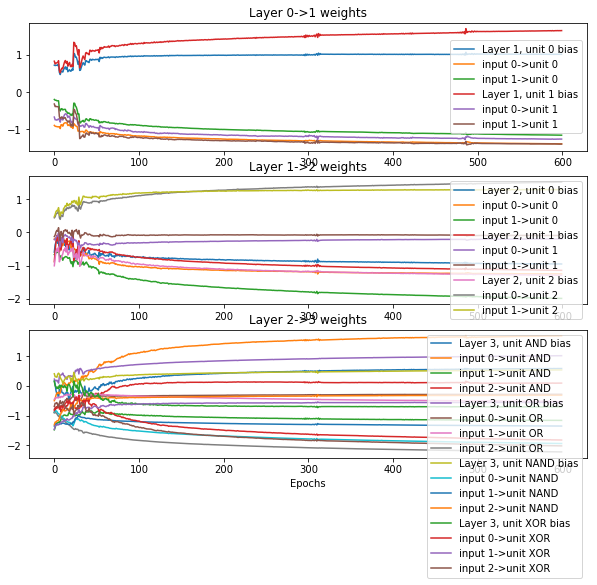

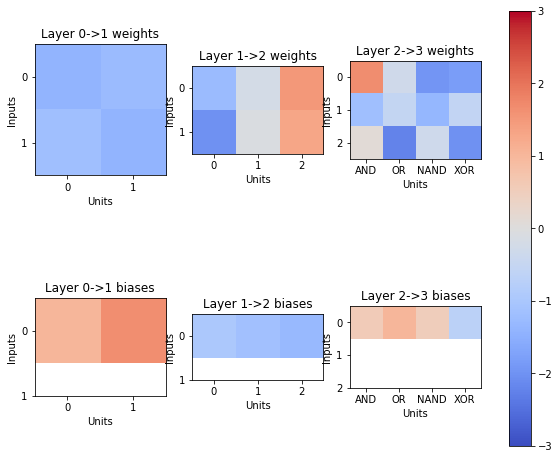

In [66]:
batchsize = 20
epochs = 600
layers = [2, 2, 3, 4]
activations = [act.tanh] * (len(layers) - 1)
dactivations = [act.dtanh] * (len(layers) - 1)
error = err.squared
derror = err.dsquared
rate = 0.5
optimizer = opt.Optimizer(rate)

n = NN(layers, activations=activations, dactivations=dactivations, error=error, derror=derror, optimizer=optimizer)

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([[0,0,1,0],
              [0,1,1,1],
              [0,1,1,1],
              [1,1,0,0]])

errors, whist = n.train(X, Y, batchsize, epochs, weighthist=True, train=(Y, X))
plotErrors(errors)
print(np.round(n.predict(X)))
plotWeightHistory(n, whist, ['AND', 'OR', 'NAND', 'XOR'])
plotFinalWeights(n, whist, ['AND', 'OR', 'NAND', 'XOR'])
